# Working with CRS and Projections in Python

The goal of this lecture is to work with PyProj, Cartopy and Shapely packages in Python and explore different crs formats. We will also transform data from one projection to another one. 

**Attribution**: Parts of this notebook is developed using great resources from [CLEX CMS Blog](https://climate-cms.org/posts/2021-10-01-pyproj.html) and [Projection Tradeoffs and Distortion - Tissot](https://uwgda-jupyterbook.readthedocs.io/en/latest/modules/04_Vector1_Geopandas_CRS_Proj/04_Vector1_Tissot_MapDistortion_demo.html)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import pyproj
import shapely
import leafmap

In [2]:
#Turn off warnings from cartopy
import warnings
warnings.filterwarnings('ignore')

## Convert CRS from one format to the other

You can generate a crs using caropy's crs module. 
For example:

In [3]:
[ccrs.Mercator()]

[<Projected CRS: +proj=merc +ellps=WGS84 +lon_0=0.0 +x_0=0.0 +y_0=0 ...>
 Name: unknown
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - undefined
 Coordinate Operation:
 - name: unknown
 - method: Mercator (variant A)
 Datum: Unknown based on WGS 84 ellipsoid
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich]

In [4]:
ccrs.Mercator()

<Projected CRS: +proj=merc +ellps=WGS84 +lon_0=0.0 +x_0=0.0 +y_0=0 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Mercator (variant A)
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Similarly, you can use pyproj to generate a crs 

In [5]:
pyproj.CRS(4326)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

You can use built in function in both pyproj and cartopy to conver the crs between different formats

In [6]:
pyproj.CRS(ccrs.Mercator().to_proj4()).to_epsg()

3395

In [7]:
pyproj.CRS(ccrs.Mercator().to_proj4()).to_wkt()

'PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Unknown based on WGS 84 ellipsoid",ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1],ID["EPSG",7030]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8901]]],CONVERSION["unknown",METHOD["Mercator (variant A)",ID["EPSG",9804]],PARAMETER["Latitude of natural origin",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8801]],PARAMETER["Longitude of natural origin",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8802]],PARAMETER["Scale factor at natural origin",1,SCALEUNIT["unity",1],ID["EPSG",8805]],PARAMETER["False easting",0,LENGTHUNIT["metre",1],ID["EPSG",8806]],PARAMETER["False northing",0,LENGTHUNIT["metre",1],ID["EPSG",8807]]],CS[Cartesian,2],AXIS["(E)",east,ORDER[1],LENGTHUNIT["metre",1,ID["EPSG",9001]]],AXIS["(N)",north,ORDER[2],LENGTHUNIT["metre",1,ID["EPSG",9001]]]]'

In [8]:
pyproj.CRS("World_Mercator")

<Projected CRS: ESRI:54004>
Name: World_Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Mercator
- method: Mercator (variant B)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Tissot’s indicatrix

Next, we will plot Tissot’s indicatrix for several projections and study map distortions:

In [9]:
#Function to create cartopy plot with Tissot circles for input crs
def tissotplot(crs):
    
    #Create figure and axes
    fig, ax = plt.subplots(subplot_kw={'projection': crs}, figsize=(8,8))
    
    #Define positions of the circles, spaced every 20 degrees
    lons = range(-180, 180, 20)
    #lats = range(-90, 90, 20)
    lats = range(-80, 81, 20)
    
    #Draw coastlines
    ax.coastlines()
    
    #Add gridlines
    gl = ax.gridlines(draw_labels=True, auto_inline=True, alpha=0.5, lw=0.5, linestyle=':')
    gl.xlocator = mticker.FixedLocator(lons)
    gl.ylocator = mticker.FixedLocator(lats)
    
    #Add tissot circles with 500 km radius
    ax.tissot(facecolor='orange', alpha=0.4, rad_km=500, lons=lons, lats=lats)
    
    #Title including projection name and proj string
    crs_name = str(crs).split(' ')[0].split('.')[-1]
    ax.set_title('%s EPSG:%s\nproj string: "%s"' % (crs_name, crs.to_epsg(), crs.to_proj4()), fontsize=10)

In [10]:
#Define projecitons to plot
#Full list is here: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html
crs_list = [ccrs.NorthPolarStereo(), ccrs.LambertAzimuthalEqualArea(), ccrs.LambertCylindrical(), ccrs.Robinson(), \
            ccrs.EqualEarth(), ccrs.Sinusoidal(), ccrs.Orthographic(), ccrs.Mercator(), \
            ccrs.TransverseMercator(), ccrs.TransverseMercator(central_longitude=-71), ccrs.UTM(19)]

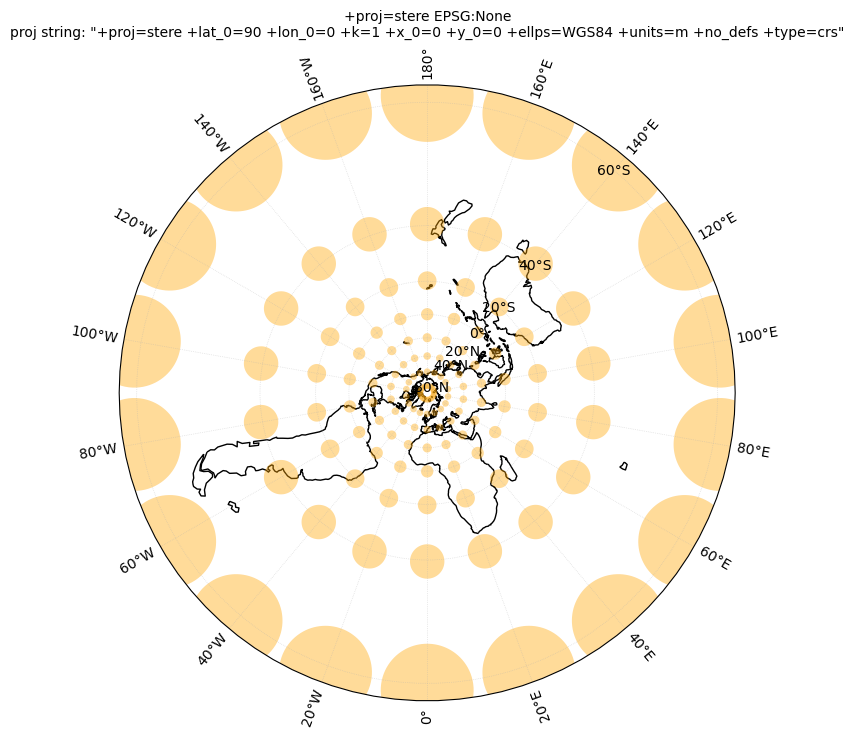

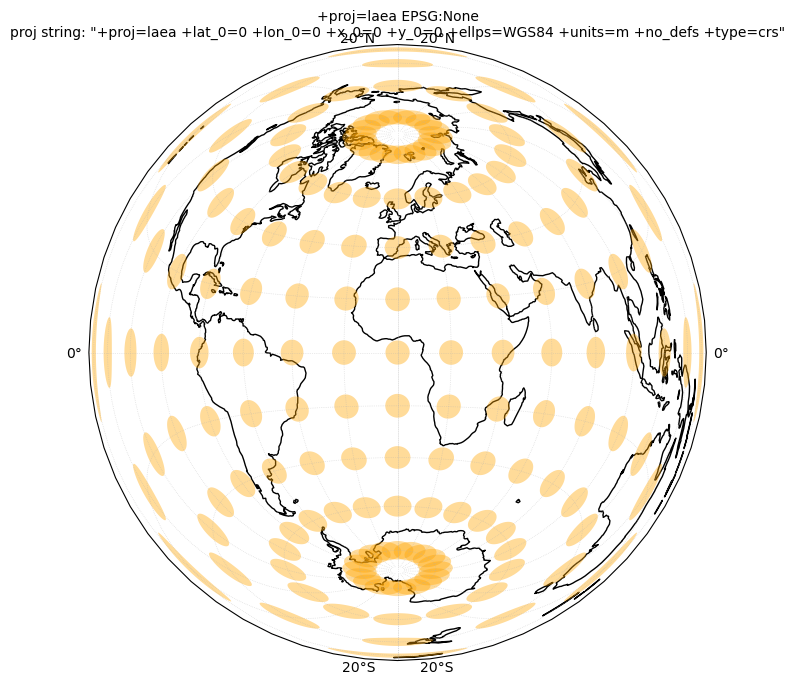

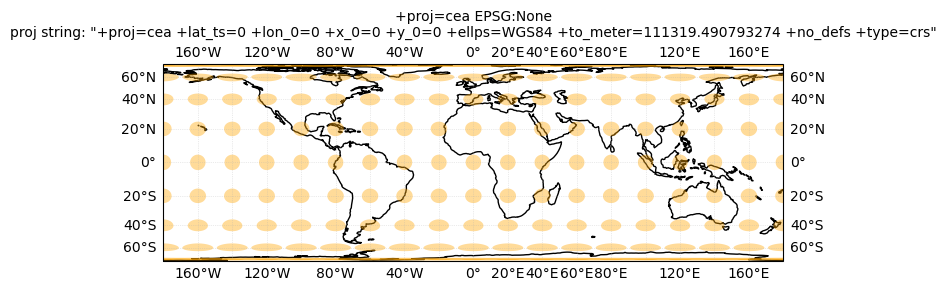

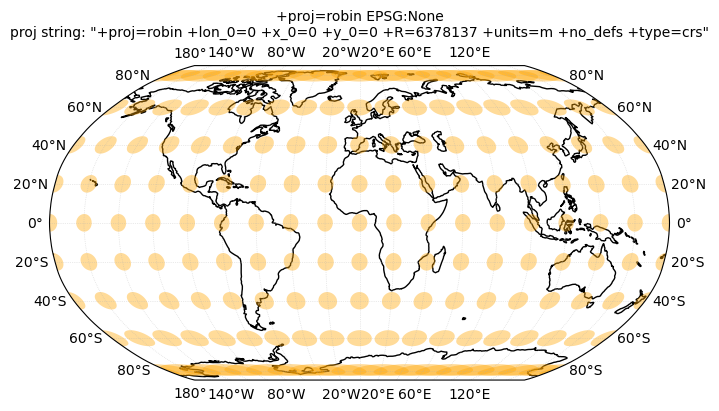

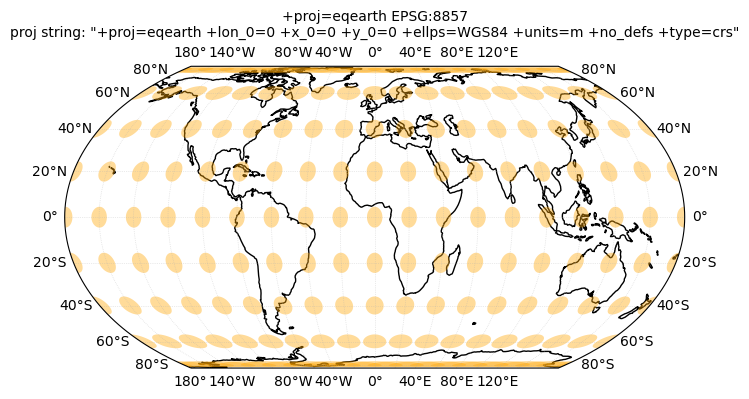

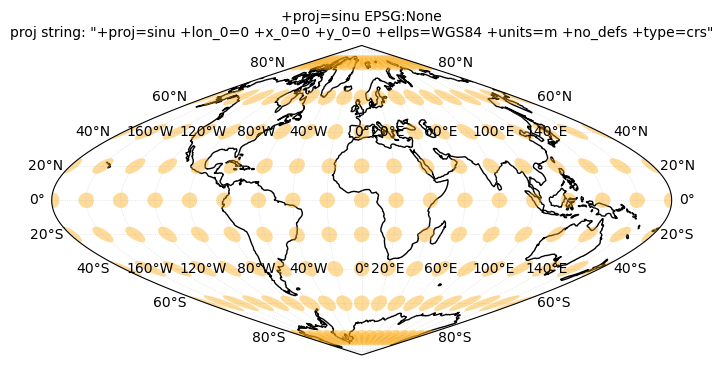

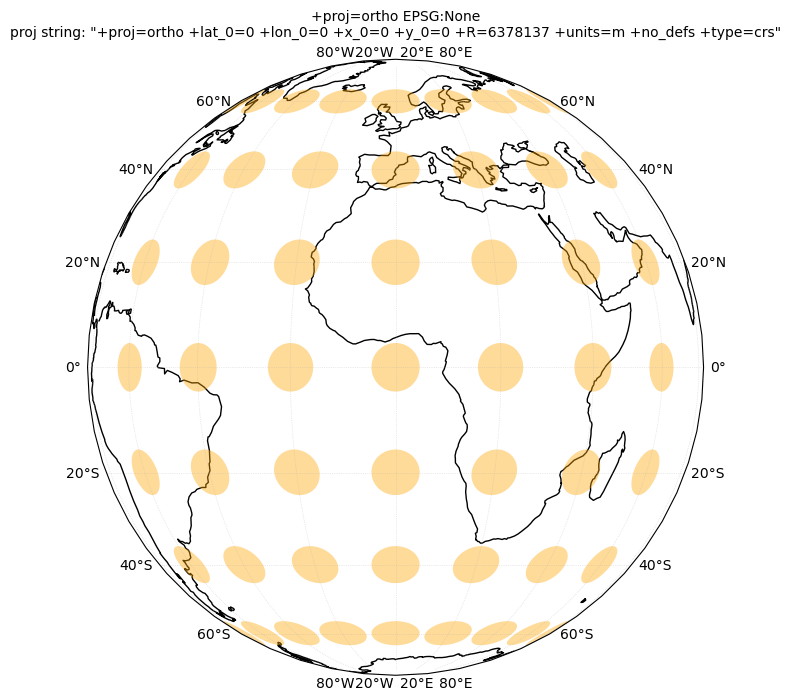

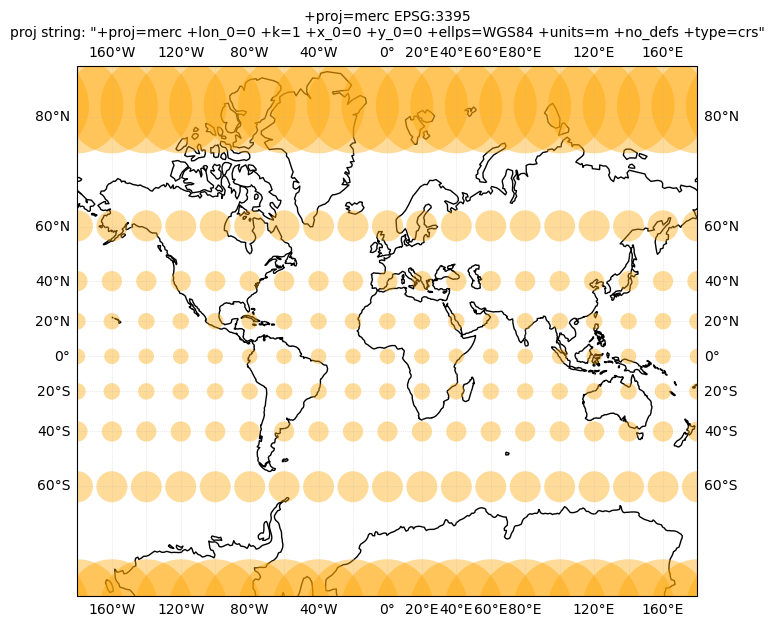

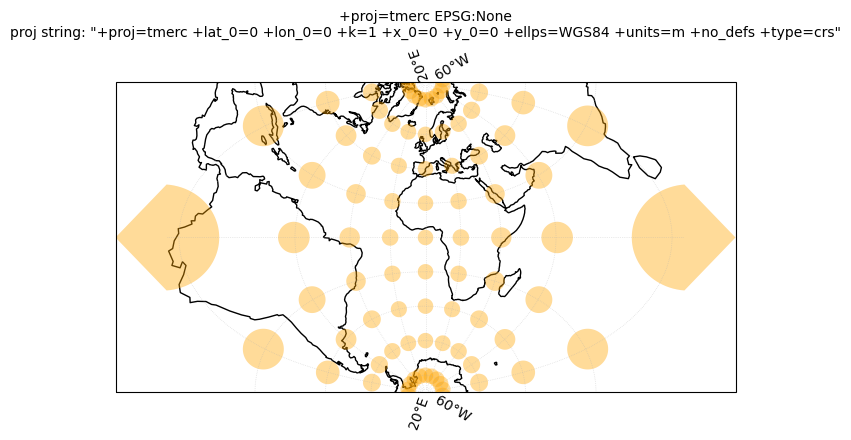

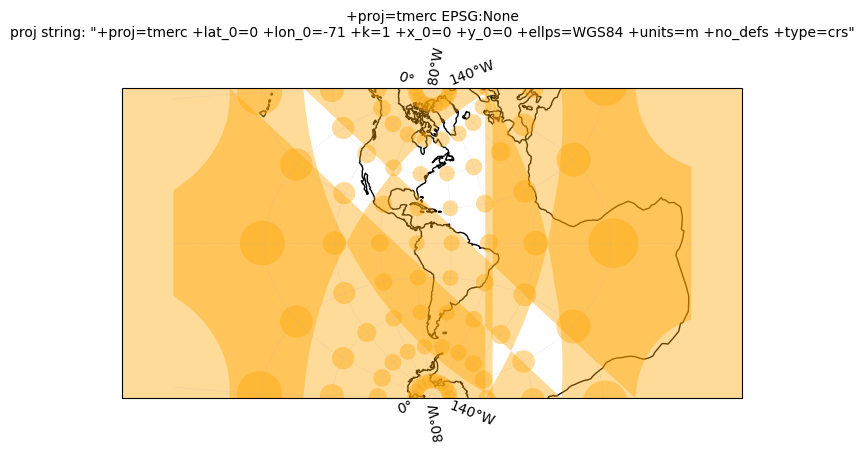

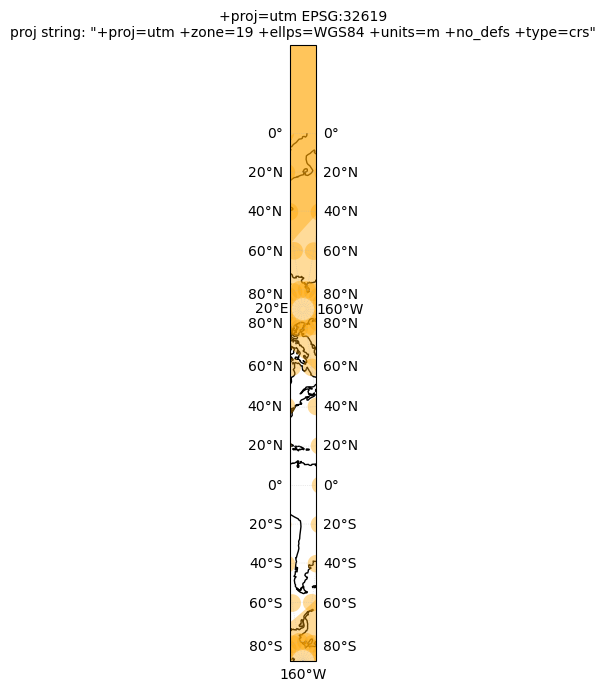

In [11]:
for crs in crs_list:
    tissotplot(crs);

## Converting coordinates with Pyproj

In this part, we will donwload a sample scene of Sentinel-2, and work with its coordinates. 


donwload a scene
load its coordinates. 
convert to 4326
plot the coordinates from both CRS


In [12]:
from pystac_client import Client

In [13]:
client = Client.open("https://earth-search.aws.element84.com/v1")
search_results = client.search(
    ids = ["S2B_37DFA_20230224_0_L2A"]
)
items = search_results.item_collection()
item = items[0]

Let's find the CRS of this scene. The crs is recorded as EPSG numbers in the properties of the item:

In [14]:
item.properties["proj:epsg"]

32737

In [15]:
item

id: S2B_37DFA_20230224_0_L2A
"bbox: [41.77852765935361, -72.16491345575483, 45.122130956889094, -71.11191009560223]"
created: 2023-02-24T15:02:57.019Z
platform: sentinel-2b
constellation: sentinel-2
instruments: ['msi']
eo:cloud_cover: 3.506481
proj:epsg: 32737
mgrs:utm_zone: 37
mgrs:latitude_band: D
mgrs:grid_square: FA


In [16]:
item.geometry

{'type': 'Polygon',
 'coordinates': [[[41.77852765935361, -71.18173043681364],
   [44.81460295895618, -71.11191009560223],
   [45.122130956889094, -72.09098682450592],
   [41.926326307987814, -72.16491345575483],
   [41.77852765935361, -71.18173043681364]]]}

The STAC metadata contains a `geometry` for each item. This geometry is recorded in EPSG:4326 (check the specification [here](https://github.com/radiantearth/stac-spec/blob/master/item-spec/item-spec.md#item-fields)). Now, we will convert this from 4326 to the crs of the scene. 

To transfrom coordinates from one crs to another one, we will creates a transformer using pyproj, and then input each point to transform it. 

In [17]:
source_crs = 'epsg:4326' # Global lat-lon coordinate system used by `geometry m
target_crs = f'epsg:{item.properties["proj:epsg"]}' # Coordinate system of the S-2 scene

latlon_to_s2_transformer = pyproj.Transformer.from_crs(source_crs, target_crs)

Let's retrieve the geometry from the `item` metadata:

In [18]:
geometry = item.geometry

In [19]:
geometry

{'type': 'Polygon',
 'coordinates': [[[41.77852765935361, -71.18173043681364],
   [44.81460295895618, -71.11191009560223],
   [45.122130956889094, -72.09098682450592],
   [41.926326307987814, -72.16491345575483],
   [41.77852765935361, -71.18173043681364]]]}

Now, create an empty geometry for our projected geometry:

In [20]:
projected_geometry = {
    "type": "Polygon",
    "coordinates" : [[]]
}

In [21]:
projected_coordinates = []
for point in geometry["coordinates"][0]:
    projected_x, projected_y = latlon_to_s2_transformer.transform(point[0], point[1])
    projected_coordinates.append([projected_x, projected_y])

In [22]:
projected_geometry["coordinates"] = [projected_coordinates]

In [23]:
projected_geometry

{'type': 'Polygon',
 'coordinates': [[[-5034706.161102917, 22347375.738133498],
   [-4631227.676135911, 22123291.71715717],
   [-4542728.576578871, 22192903.107910063],
   [-4958974.741806454, 22435202.22502178],
   [-5034706.161102917, 22347375.738133498]]]}

## Use Shapely to work with geometries

Another useful Python package, is Shapely for analysis and manipulation of geometric features. Here, we will use it to investigate our geometries. Note that Shapely doesn't have a notion of crs, and only look at the object as a geomtric object. 

Shapely has a reach set of objects, and here we will use the Polygon one. You can create a Shapely Polygon using the following:

In [24]:
shapely_geo = shapely.geometry.shape(geometry)

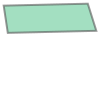

In [25]:
shapely_geo

Let's retrieve a property of the this Polygon, such as area:

In [26]:
shapely_geo.bounds

(41.77852765935361, -72.16491345575483, 45.122130956889094, -71.11191009560223)

In [27]:
shapely_geo.area

3.0735047508188207

We can do the same using the projected geometry:

In [28]:
shapely_projected_geo = shapely.geometry.shape(projected_geometry)

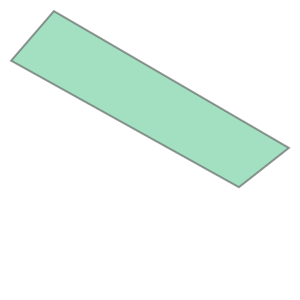

In [29]:
shapely_projected_geo

In [30]:
shapely_projected_geo.area

51412513482.37867

As you can see, the areas are very different. In this case, `geometry` is in lat/lon coordinates, and `projected_geometry` is in UTM coordinates (meter). Therefore, their corresponding areas are in their native units.

But we can confirm that these two polygons are indeed the same:

**First Approach**: Tranform the polygon back to its original coordinates:

In [31]:
source_crs = f'epsg:{item.properties["proj:epsg"]}' # Coordinate system of the S-2 scene
target_crs = 'epsg:4326' # Global lat-lon coordinate system used by `geometry m

s2_to_latlon_transformer = pyproj.Transformer.from_crs(source_crs, target_crs)

reprojected_geometry = {
    "type": "Polygon",
    "coordinates" : [[]]
}

reprojected_coordinates = []
for point in projected_geometry["coordinates"][0]:
    projected_x, projected_y = s2_to_latlon_transformer.transform(point[0], point[1])
    reprojected_coordinates.append([projected_x, projected_y])

reprojected_geometry["coordinates"] = [reprojected_coordinates]

In [32]:
reprojected_geometry

{'type': 'Polygon',
 'coordinates': [[[41.77852765935368, -71.18173043681335],
   [44.814602958956264, -71.1119100956021],
   [45.12213095688916, -72.0909868245058],
   [41.926326307987836, -72.16491345575457],
   [41.77852765935368, -71.18173043681335]]]}

In [33]:
geometry

{'type': 'Polygon',
 'coordinates': [[[41.77852765935361, -71.18173043681364],
   [44.81460295895618, -71.11191009560223],
   [45.122130956889094, -72.09098682450592],
   [41.926326307987814, -72.16491345575483],
   [41.77852765935361, -71.18173043681364]]]}

While there are minor differences in the reprojected geometry vs the original geometry, they look overall the same. These differences are due to transformation errors.

**Second Approach**: Plot the two geometries using leafmap

In [41]:
m = leafmap.Map(center=[-71.822833, 42.250809], zoom=6, height="800px")
m

Map(center=[-71.822833, 42.250809], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [42]:
m.add_geojson(reprojected_geometry, layer_name="original")
m

string indices must be integers, not 'str'


Map(center=[-71.822833, 42.250809], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [43]:
m.add_geojson(reprojected_geometry, layer_name="reprojected")
m

string indices must be integers, not 'str'


Map(bottom=13371.0, center=[-71.822833, 42.250809], controls=(ZoomControl(options=['position', 'zoom_in_text',…